In [2]:
import pandas as pd
import numpy as np

In [3]:
titanic = pd.read_csv('C:/Users\santh/OneDrive/Desktop/Thiyag/BDA 104-Assignment/Titanic_original.csv')

In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [5]:
titanic_sex = pd.get_dummies(titanic['Sex'])
titanic_new = pd.concat([titanic, titanic_sex], axis=1)
titanic_new.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [6]:
titanic_num = titanic_new._get_numeric_data()
titanic1 = titanic_num.dropna()

In [7]:
X = titanic1[['PassengerId','Pclass','Age','SibSp','Parch','Fare','female','male']]
Y = titanic1['Survived']

In [8]:
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['details','Score']
print(featureScores.nlargest(8,'Score'))

       details        Score
5         Fare  4139.343839
6       female   131.520858
0  PassengerId    91.869682
7         male    75.776918
2          Age    30.209234
1       Pclass    28.973197
4        Parch    10.479759
3        SibSp     0.362316


In [9]:
X = titanic1[['Pclass','Age','Fare','female','male','Parch']]
Y = titanic1['Survived']

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
lrf = logreg.fit(X_train, y_train)

C:\Users\santh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [11]:
pred = lrf.predict(X_test)
accuracy_score(y_test,pred)

0.8093023255813954

In [12]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 10, 50, 600]}
metrics = ['precision', 'recall_weighted','accuracy']

In [13]:
GS = GridSearchCV(logreg,param_grid=param_grid,scoring=metrics,cv=5,refit='accuracy')

In [14]:
GS.fit(X_train, y_train)

C:\Users\santh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\santh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\santh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\santh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\santh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 10, 50, 600]}, pre_dispatch='2*n_jobs',
       refit='accuracy', return_train_score='warn',
       scoring=['precision', 'recall_weighted', 'accuracy'], verbose=0)

In [15]:
print(GS.best_estimator_)
print(GS.best_params_)
print(GS.best_score_)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
{'C': 1}
0.7855711422845691


In [17]:
newdf = pd.DataFrame(GS.cv_results_)

In [18]:
newdf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_train_accuracy,split1_train_accuracy,split2_train_accuracy,split3_train_accuracy,split4_train_accuracy,mean_train_accuracy,std_train_accuracy
0,0.006146,0.007529,0.003124,0.006248,1,{'C': 1},0.756757,0.729730,0.735294,0.714286,...,0.785571,0.023489,1,0.789474,0.784461,0.784461,0.789474,0.7775,0.785074,0.004401
1,0.001302,0.002604,0.003124,0.006248,10,{'C': 10},0.750000,0.702703,0.722222,0.707317,...,0.777555,0.027149,2,0.779449,0.786967,0.786967,0.784461,0.7700,0.781569,0.006403
2,0.000000,0.000000,0.000000,0.000000,50,{'C': 50},0.750000,0.702703,0.702703,0.707317,...,0.775551,0.028696,3,0.779449,0.786967,0.781955,0.784461,0.7700,0.780566,0.005848
3,0.001302,0.002603,0.006249,0.007653,600,{'C': 600},0.750000,0.702703,0.702703,0.707317,...,0.775551,0.028696,3,0.779449,0.786967,0.781955,0.781955,0.7700,0.780065,0.005594


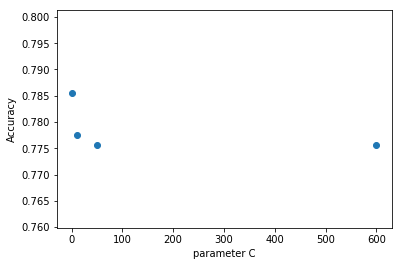

In [22]:
import matplotlib.pyplot as plt
plt.scatter(newdf['param_C'],newdf['mean_test_accuracy'])
plt.xlabel('parameter C')
plt.ylabel('Accuracy')
plt.show()

In [24]:
from sklearn.model_selection import KFold,cross_val_score
kf = KFold(n_splits=5)
res = cross_val_score(GS,X,Y, scoring='accuracy', cv=kf)

C:\Users\santh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\santh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\santh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\santh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\santh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\santh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\santh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\santh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\santh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\santh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\santh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\santh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\santh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\santh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\santh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [25]:
print(res.mean()*100)

77.87353491578844


In [26]:
from sklearn.metrics import classification_report
y_true, y_pred = y_test, GS.predict(X_test)
print (classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       125
           1       0.80      0.73      0.76        90

   micro avg       0.81      0.81      0.81       215
   macro avg       0.81      0.80      0.80       215
weighted avg       0.81      0.81      0.81       215

